In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")   #to ignore warnings

In [2]:
df=pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [8]:
#Performing EDA

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#to find the duplicate rows
df.duplicated().sum()

1

In [13]:
df[df.duplicated()]#to see the duplicate row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [16]:
df.drop_duplicates(inplace=True)

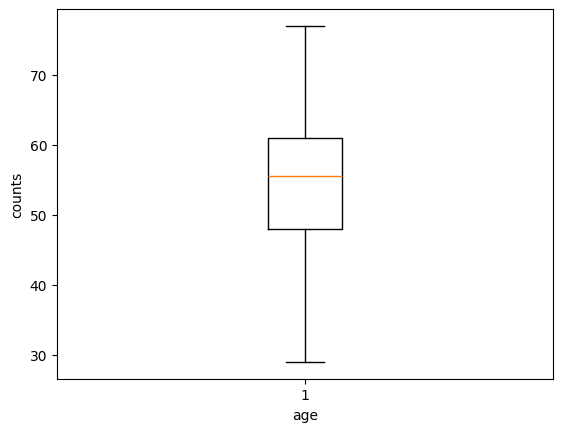

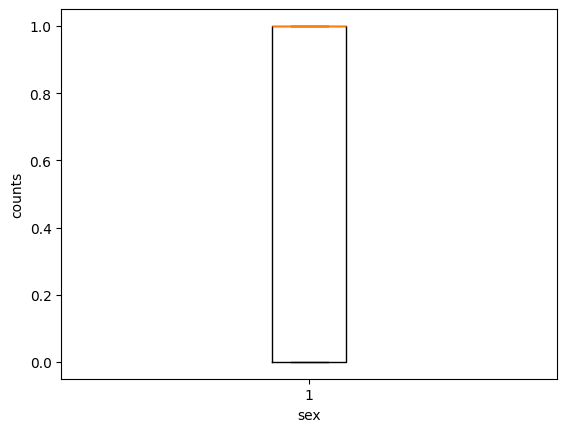

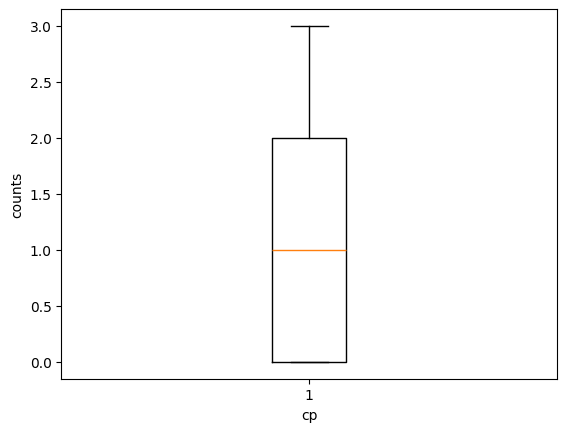

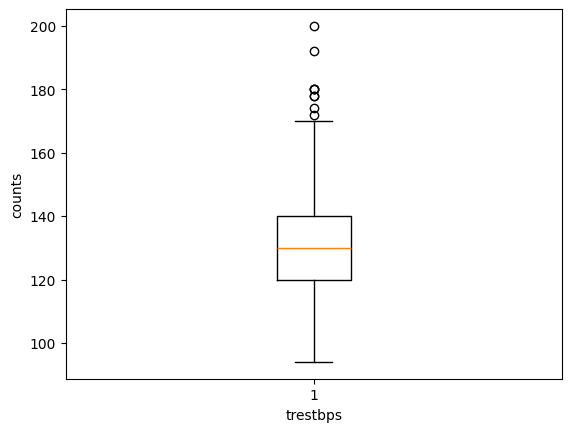

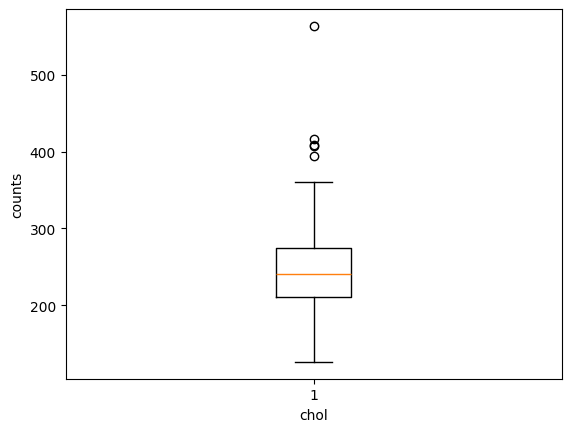

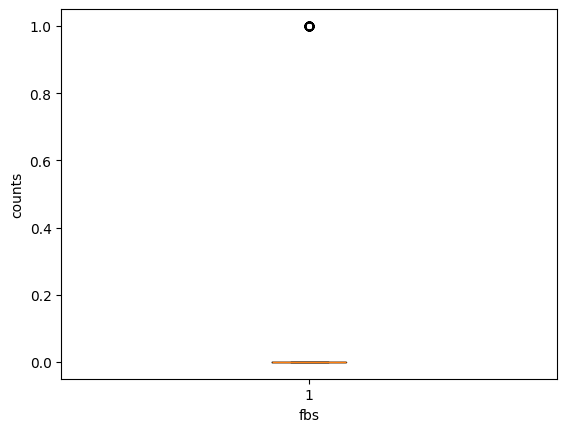

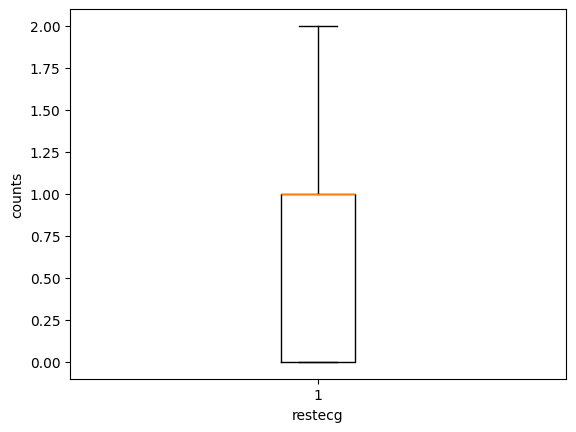

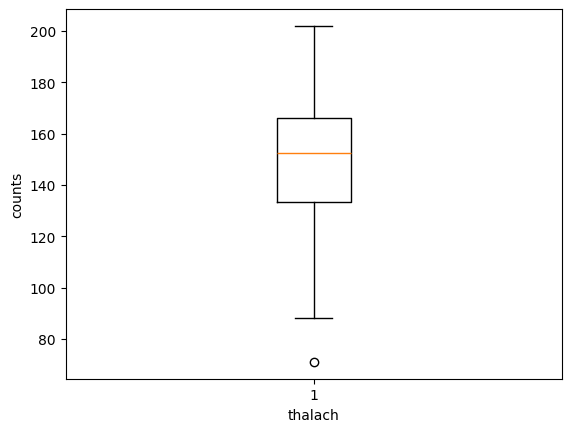

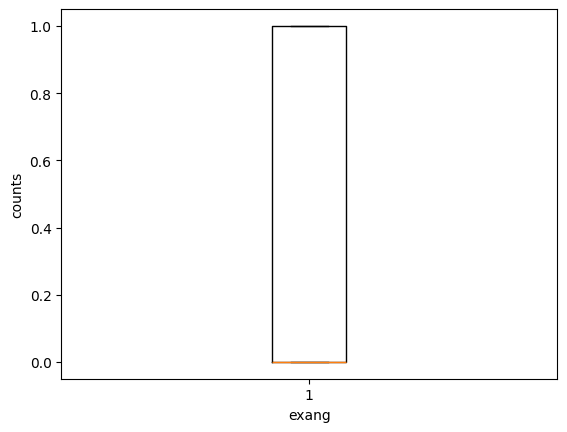

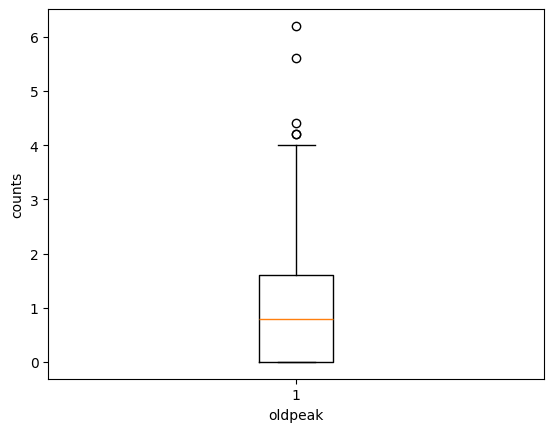

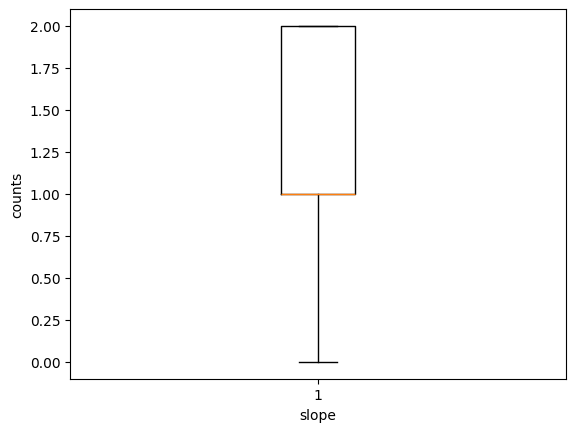

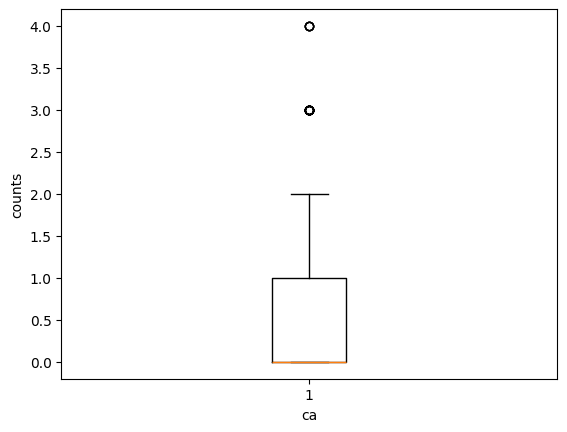

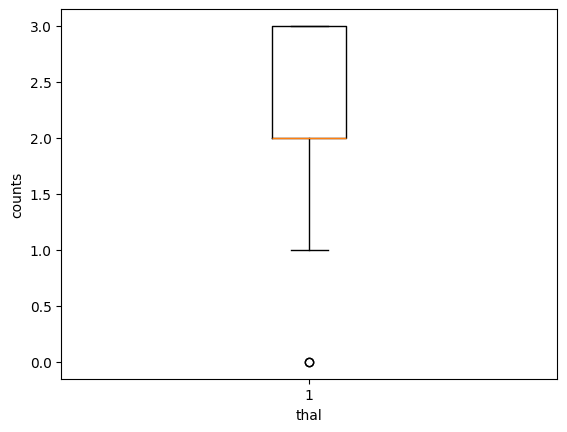

In [17]:
#Checking for Outliers
for i in df.columns:
    if ((df[i].dtypes!="object")&(i!="target")):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("counts")
        plt.show()

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
outlist=['chol','thalach',
        'oldpeak', 'ca', 'thal']

In [20]:
for i in outlist:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[i]<=Q3+1.5*IQR) & (df[i]>=Q1-1.5*IQR)]

In [21]:
df.shape

(269, 14)

In [22]:
# Model Building
#Here we are going with building the model and then performing hyper parametric tuning

In [23]:
#split the data into x and y
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 269, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt=DecisionTreeClassifier()

In [31]:
dt1=dt.fit(x_train,y_train)

In [32]:
y_pred=dt.predict(x_test)

In [33]:
from sklearn.metrics import *

In [34]:
accuracy_score(y_pred,y_test)

0.7962962962962963

In [35]:
confusion_matrix(y_pred,y_test)

array([[17,  7],
       [ 4, 26]], dtype=int64)

In [36]:
#Plotting the desicion tree

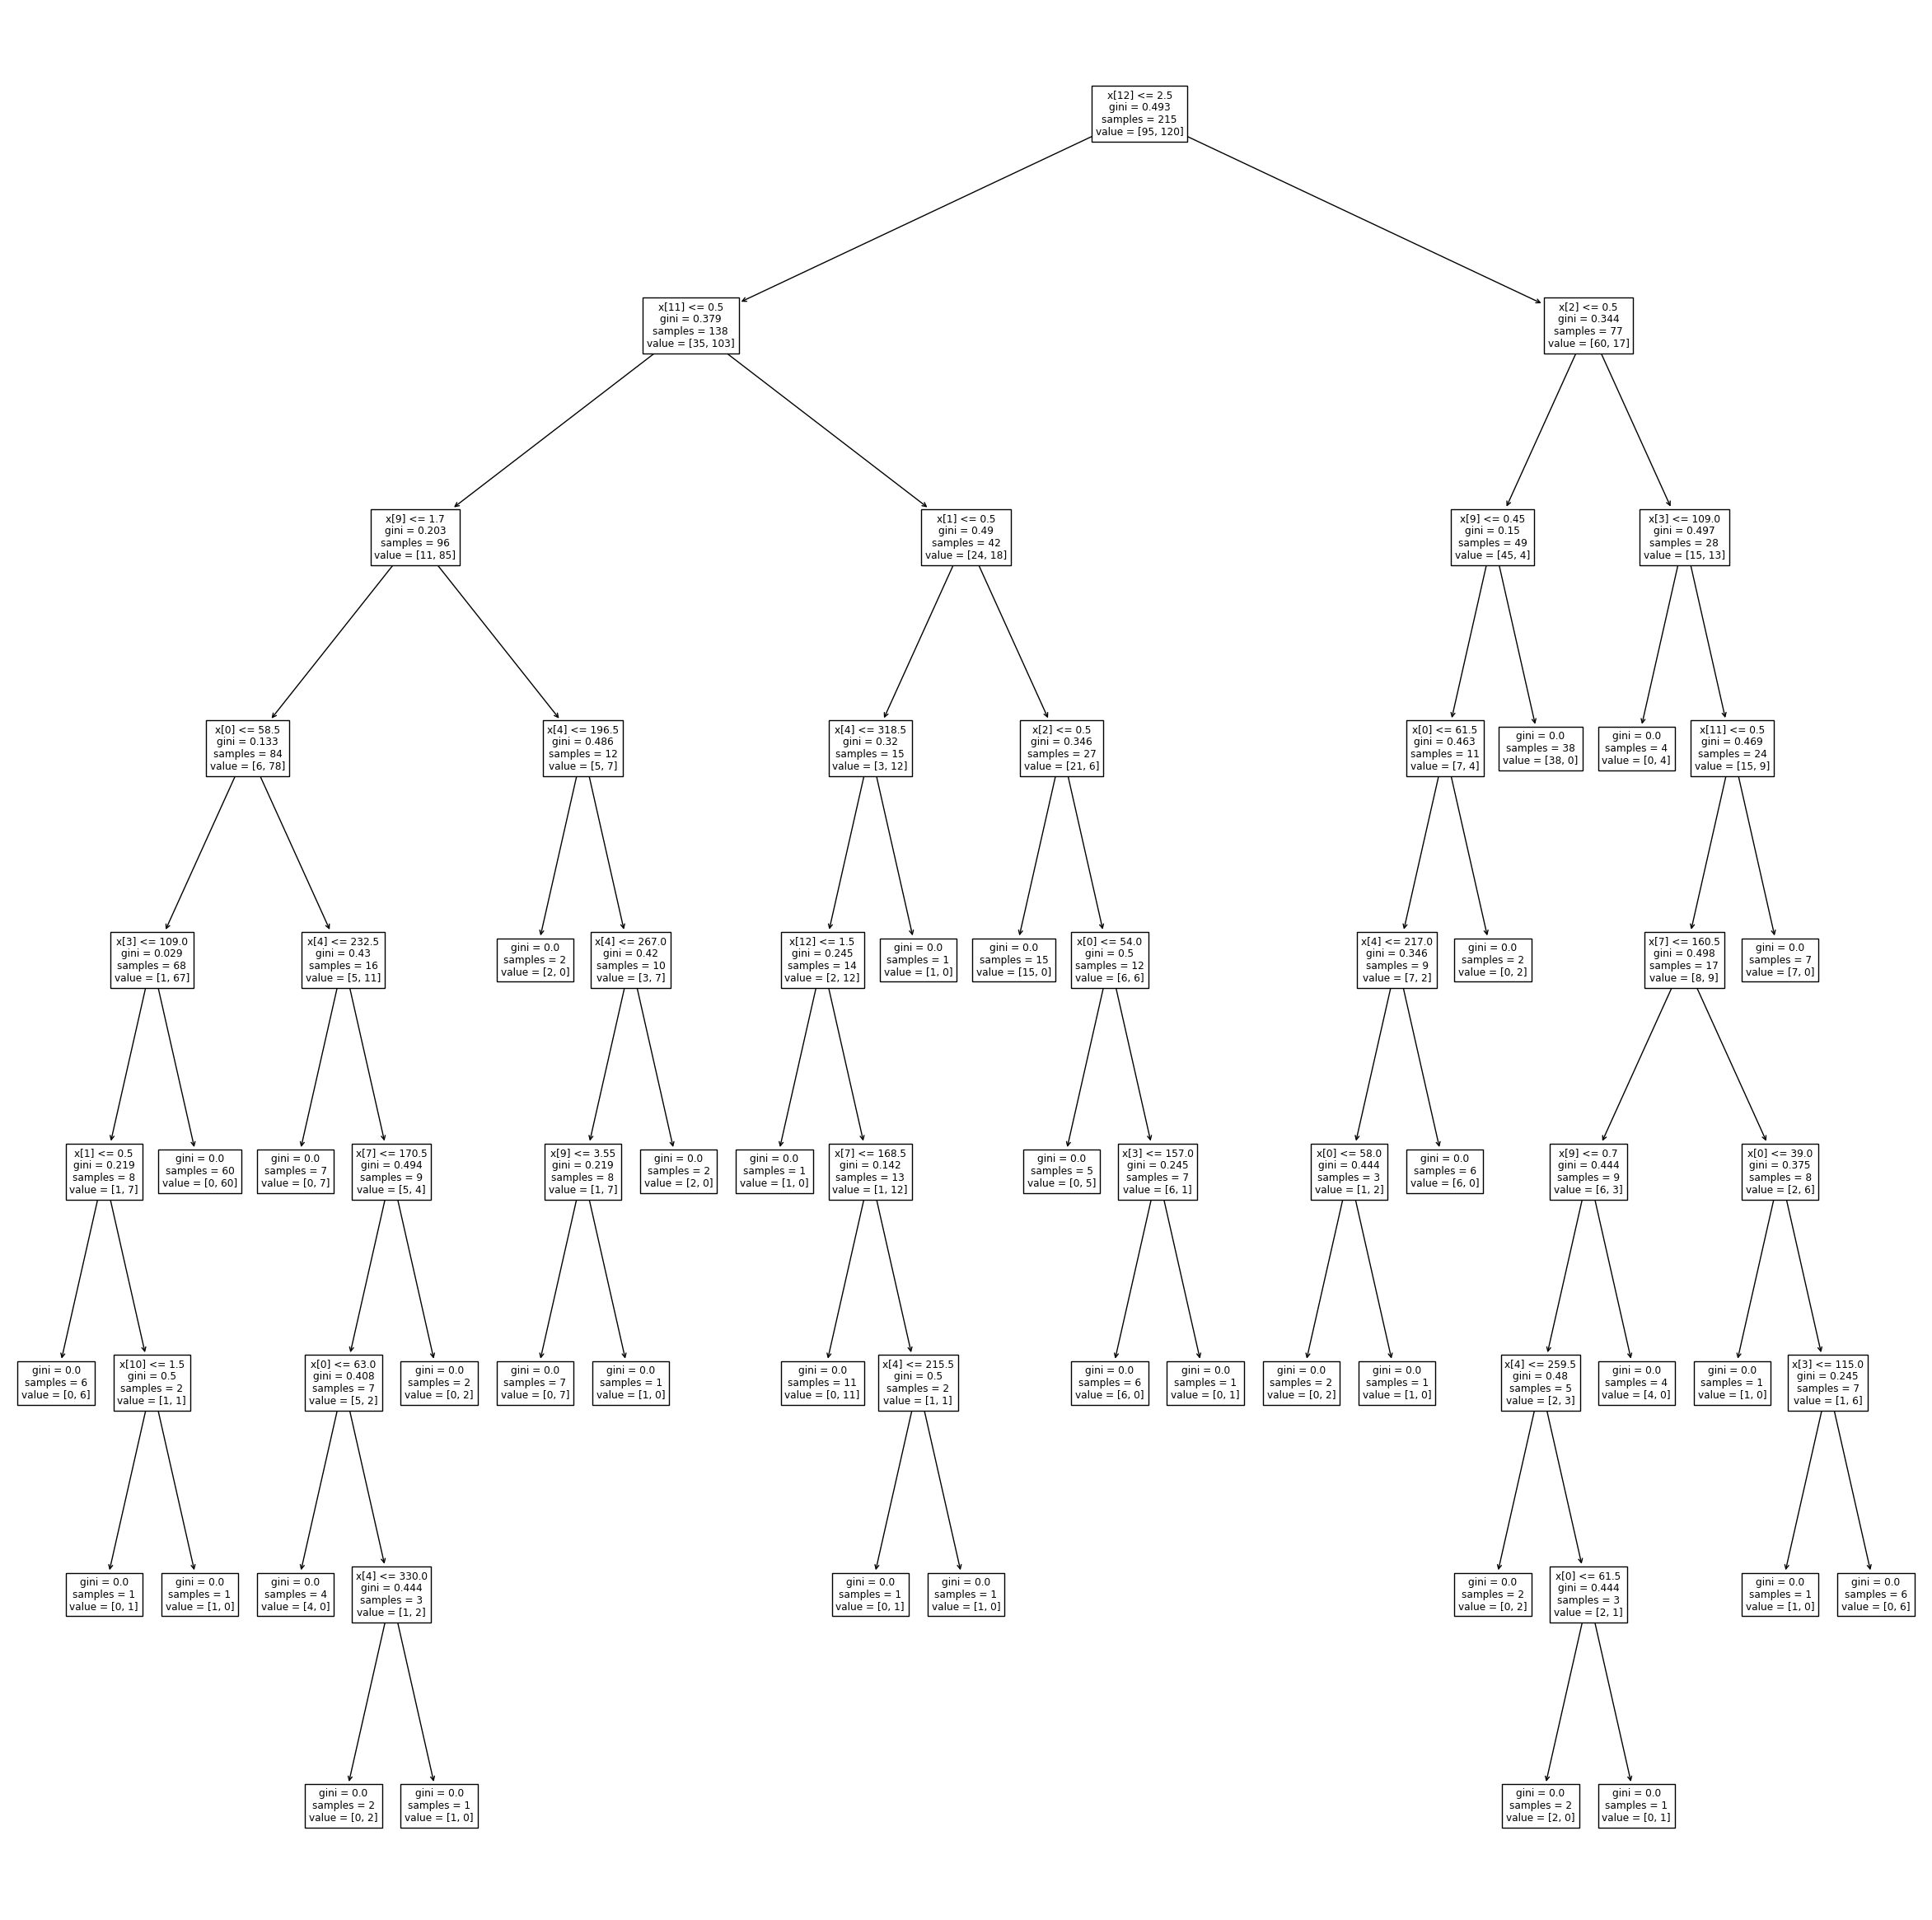

In [37]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dt1)
plt.show()

In [38]:
#Hyperparameterization Tuning is the process of selecting the optimal value for the hyperparameters of a machine learning model

In [39]:
#HyperParameterisation

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid={
    "criterion":["gini","entropy"],
    "max_depth":[None,5,10],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [43]:
dt=DecisionTreeClassifier()

In [44]:
#GridSearchCV
grid_search=GridSearchCV(dt,param_grid,cv=5)

In [45]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [46]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [47]:
#Printing the best hyper parameters
best_params=grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [48]:
#best estimator
best_dt=grid_search.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [49]:
#noiw the best_dt contains all the parameters so we can use that to predict the results
y_pred=best_dt.predict(x_test)

In [50]:
accuracy_score(y_pred,y_test)

0.9629629629629629